In [6]:
import numpy as np
import random
import os
import cv2
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from keras.models import load_model

# Read and label data

In [16]:
data = []
labels = []
imagePaths = list(paths.list_images("data"))
random.shuffle(imagePaths)

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (150, 150))
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
print(labels)

data\OldSpice\28.jpg
data\Arena\23.jpg
data\LG\26.jpg
data\huawei\17.jpg
data\Apple\40.jpg
data\LG\76.jpg
data\huawei\18.jpg
data\Intel\1.jpg
data\samsung\65.jpg
data\Addidas\84.jpg
data\OldSpice\24.jpg
data\LG\61.jpg
data\Arena\34.jpg
data\samsung\5.jpg
data\Apple\22.jpg
data\McDonalds\12.jpg
data\Reebok\26.jpg
data\OldSpice\49.jpg
data\Apple\1.jpg
data\Arena\14.jpg
data\Addidas\77.jpg
data\Addidas\58.jpg
data\LG\22.jpg
data\chanel\58.jpg
data\huawei\2.jpg
data\Arena\73.jpg
data\chanel\12.jpg
data\Intel\83.jpg
data\samsung\7.jpg
data\Arena\76.jpg
data\Apple\16.jpg
data\huawei\57.jpg
data\chanel\32.jpg
data\chanel\66.jpg
data\huawei\53.jpg
data\huawei\54.jpg
data\chanel\68.jpg
data\McDonalds\97.jpg
data\Addidas\39.jpg
data\Apple\6.jpg
data\Intel\57.jpg
data\KFC\37.jpg
data\Arena\5.jpg
data\Reebok\19.jpg
data\chanel\65.jpg
data\huawei\4.jpg
data\Reebok\43.jpg
data\Addidas\13.jpg
data\Reebok\18.jpg
data\samsung\46.jpg
data\Intel\70.jpg
data\Arena\58.jpg
data\LG\31.jpg
data\samsung\60.jpg

# Extract train/test data

In [8]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size = 0.25, random_state = 42)
one_hot_encoder = OneHotEncoder()

train_y = train_y.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)
train_y = one_hot_encoder.fit_transform(train_y).toarray()
test_y = one_hot_encoder.transform(test_y).toarray()

train_datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = "nearest")

print(train_x[0].shape, train_y.shape)

(150, 150, 3) (740, 12)


# Build model using Xception

In [9]:
xception_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
for layer in xception_model.layers:
    layer.trainable = False

additional_model = Flatten()(xception_model.output)
additional_model = Dense(1024, activation='relu')(additional_model)
additional_model = Dropout(0.2)(additional_model)
additional_model = Dense(train_y.shape[1], activation='sigmoid')(additional_model)
model = Model(xception_model.input, additional_model)
model.compile(optimizer = RMSprop(learning_rate=0.001), loss = "categorical_crossentropy", metrics = "acc")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

# Extract history

In [10]:
history = model.fit(train_datagen.flow(train_x, train_y), validation_data = (test_x, test_y), epochs = 10, verbose = 2)

Epoch 1/10
24/24 - 32s - loss: 20.3750 - acc: 0.4270 - val_loss: 2.7954 - val_acc: 0.6154 - 32s/epoch - 1s/step
Epoch 2/10
24/24 - 28s - loss: 2.5961 - acc: 0.6365 - val_loss: 2.8247 - val_acc: 0.5789 - 28s/epoch - 1s/step
Epoch 3/10
24/24 - 29s - loss: 1.6745 - acc: 0.7149 - val_loss: 2.8507 - val_acc: 0.6559 - 29s/epoch - 1s/step
Epoch 4/10
24/24 - 30s - loss: 1.7596 - acc: 0.7027 - val_loss: 1.5864 - val_acc: 0.7166 - 30s/epoch - 1s/step
Epoch 5/10
24/24 - 29s - loss: 0.8263 - acc: 0.8176 - val_loss: 2.0802 - val_acc: 0.6640 - 29s/epoch - 1s/step
Epoch 6/10
24/24 - 28s - loss: 1.2417 - acc: 0.7770 - val_loss: 3.1565 - val_acc: 0.6437 - 28s/epoch - 1s/step
Epoch 7/10
24/24 - 29s - loss: 0.9869 - acc: 0.8189 - val_loss: 3.1230 - val_acc: 0.6316 - 29s/epoch - 1s/step
Epoch 8/10
24/24 - 29s - loss: 0.7313 - acc: 0.8405 - val_loss: 2.1586 - val_acc: 0.7085 - 29s/epoch - 1s/step
Epoch 9/10
24/24 - 30s - loss: 0.6521 - acc: 0.8595 - val_loss: 2.4602 - val_acc: 0.6964 - 30s/epoch - 1s/step


# Prediction

In [11]:
model.evaluate(test_x, test_y)
preds = model.predict(test_x)
for i in range(len(preds)):
    print("Pred:", np.argmax(preds[i]), ";", " Real: ", np.argmax(test_y[i]))

8/8 [==============================] - 6s 608ms/step
Pred: 9 ;  True:  9
Pred: 4 ;  True:  4
Pred: 0 ;  True:  7
Pred: 2 ;  True:  5
Pred: 5 ;  True:  5
Pred: 1 ;  True:  1
Pred: 5 ;  True:  10
Pred: 9 ;  True:  9
Pred: 11 ;  True:  11
Pred: 8 ;  True:  9
Pred: 0 ;  True:  0
Pred: 0 ;  True:  0
Pred: 2 ;  True:  2
Pred: 2 ;  True:  2
Pred: 8 ;  True:  8
Pred: 10 ;  True:  4
Pred: 5 ;  True:  5
Pred: 4 ;  True:  4
Pred: 10 ;  True:  10
Pred: 9 ;  True:  9
Pred: 0 ;  True:  2
Pred: 0 ;  True:  6
Pred: 6 ;  True:  6
Pred: 10 ;  True:  5
Pred: 5 ;  True:  5
Pred: 6 ;  True:  6
Pred: 9 ;  True:  4
Pred: 0 ;  True:  0
Pred: 2 ;  True:  2
Pred: 11 ;  True:  2
Pred: 3 ;  True:  8
Pred: 3 ;  True:  3
Pred: 1 ;  True:  1
Pred: 9 ;  True:  9
Pred: 2 ;  True:  2
Pred: 2 ;  True:  10
Pred: 8 ;  True:  3
Pred: 5 ;  True:  5
Pred: 9 ;  True:  7
Pred: 9 ;  True:  9
Pred: 11 ;  True:  11
Pred: 9 ;  True:  9
Pred: 9 ;  True:  2
Pred: 6 ;  True:  7
Pred: 3 ;  True:  2
Pred: 6 ;  True:  6
Pred: 4 ;  True:

# Displaying predicitons

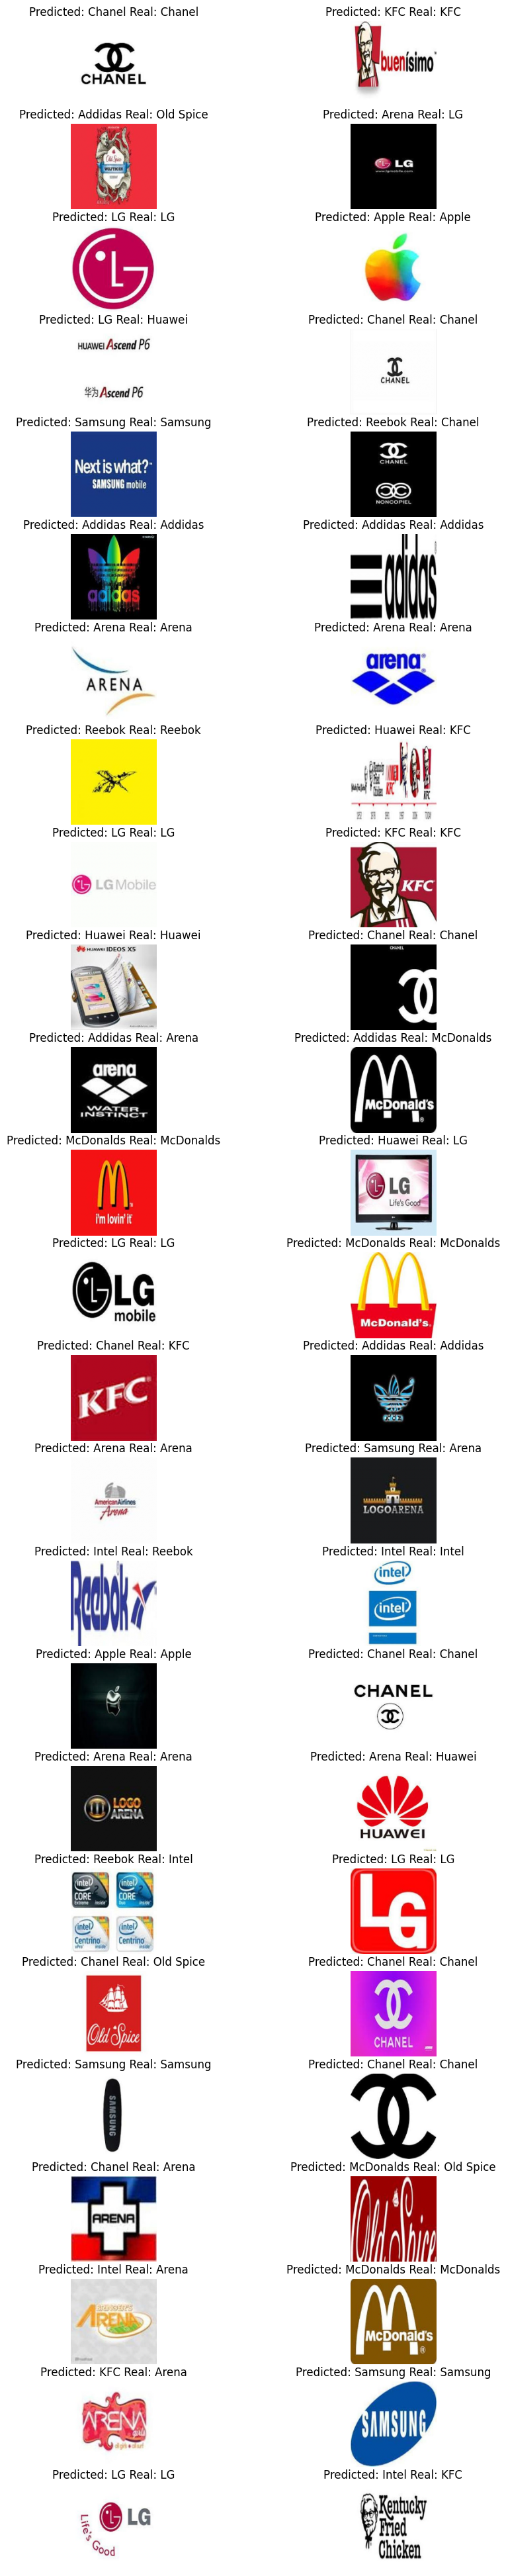

In [29]:
breed_labels = ["Adidas", "Apple", "Arena", "Intel", "KFC", "LG", "McDonalds", "Old Spice", "Reebok", "Chanel", "Huawei", "Samsung"]
f = plt.figure(figsize=(10,50))

n = 50
for i in range(n):
    f.add_subplot(n // 2, 2, i + 1)
    image = test_x[i][:, :, ::-1]
    plt.imshow(image)
    plt.axis("off")
    plt.title("Predicted: " + breed_labels[np.argmax(preds[i])] + " Real: " + breed_labels[np.argmax(test_y[i])])

# Save model

In [30]:
model.save("logo-guess-model")

INFO:tensorflow:Assets written to: logo-guess-model\assets


INFO:tensorflow:Assets written to: logo-guess-model\assets


# Load model again

In [31]:
new_model = load_model("logo-guess-model")

# Load videos and process frames

In [59]:
mcdonaldsVideo = cv2.VideoCapture('data/video/mcdonalds.mp4')
mcdonaldsVideo2 = cv2.VideoCapture('data/video/mcdonalds2.mp4')
adidasVideo = cv2.VideoCapture('data/video/adidas.mp4')

videos = [(mcdonaldsVideo, 6), (mcdonaldsVideo2, 6), (adidasVideo, 0)]

In [60]:
i = 1
for video, logo_index in videos:
    logo_appearances = []
    time = round(video.get(cv2.CAP_PROP_FRAME_COUNT) / video.get(cv2.CAP_PROP_FPS))

    start_logo = -1
    end_logo = -1

    for time_unit in range(time):
        video.set(cv2.CAP_PROP_POS_MSEC, time_unit*1000)
        _, frame = video.read()

        frame = frame / 255.0

        frame = cv2.resize(frame, (150, 150))
        prediction = new_model.predict(frame[None, :, :], verbose=0)
        logo_flag = np.argmax(prediction)
        if logo_flag != logo_index:
            if start_logo != -1:
                logo_appearances.append((start_logo // 60, start_logo % 60,
                                         end_logo // 60, end_logo % 60))

            start_logo = -1
            end_logo = -1
        else:
            if start_logo != -1:
                end_logo = time_unit
            else:
                start_logo = end_logo = time_unit

    if start_logo != -1:
        logo_appearances.append((start_logo // 60, start_logo % 60,
                                 end_logo // 60, end_logo % 60))

    print("Logo appearances in video:", i)
    for logo in logo_appearances:
        print(f"Logo appeared at {logo[0]}:{logo[1]} and ended at {logo[2]}:{logo[3]}")
    print()
    i += 1

Logo appearances in video: 1
Logo appeared at 0:13 and ended at 0:14

Logo appearances in video: 2
Logo appeared at 0:0 and ended at 0:1
Logo appeared at 0:3 and ended at 0:9

Logo appearances in video: 3
Logo appeared at 0:5 and ended at 0:5
Logo appeared at 0:24 and ended at 0:24
Logo appeared at 0:52 and ended at 0:52
Logo appeared at 0:57 and ended at 0:57
Logo appeared at 0:59 and ended at 0:59

